In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/flipkart_com-ecommerce_sample_1050.csv")
df['categorie'] = [c[2:-1].split('>>')[0][0:-1].lower().replace(" ","_") for c in df["product_category_tree"]]
df = df[['categorie','description','image']]

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = df['description']
y=df['categorie']
X_2, X_test, y_2, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_2, y_2, test_size=0.15, random_state=42)


stop_words = ["of","and","at","the","for","-","you","to","is","on","it","your","these","with"]
vectorizer = CountVectorizer(stop_words=stop_words)
vectorizer.fit(X)
X_train_vect = vectorizer.transform(X_train)
X_test_vect = vectorizer.transform(X_test)
X_val_vect = vectorizer.transform(X_val)
len_voc = len(vectorizer.vocabulary_)

# je dois trasnformer ma variable cible en dummies 
# afin que chaque neurone de la dernière couche ait sa propre colone.
from tensorflow.keras.utils import to_categorical
#y_train.replace(["happy","sadness","anger","fear","love","surprise"],[0,1,2,3,4,5],inplace=True)
#y_test.replace(["happy","sadness","anger","fear","love","surprise"],[0,1,2,3,4,5],inplace=True)
y_train.replace(["beauty_and_personal_care","kitchen_&_dining","baby_care","home_decor_&_festive_needs","watches","home_furnishing","computers"],[0,1,2,3,4,5,6],inplace=True)
y_test.replace(["beauty_and_personal_care","kitchen_&_dining","baby_care","home_decor_&_festive_needs","watches","home_furnishing","computers"],[0,1,2,3,4,5,6],inplace=True)
y_val.replace(["beauty_and_personal_care","kitchen_&_dining","baby_care","home_decor_&_festive_needs","watches","home_furnishing","computers"],[0,1,2,3,4,5,6],inplace=True)

dummy_y_train = to_categorical( y_train)
dummy_y_test = to_categorical( y_test)
dummy_y_val = to_categorical( y_val)

In [148]:
len(vectorizer.vocabulary_)

6040

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# La première couches a autant de neurones que mon vocabulaire a de mots (= nb de features)
input_dim = X_train_vect.shape[1] # Number of features

# Je définis l'architecture de mon réseau de neurones
model = Sequential()
model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(0.2))

# Classification multinomial donc soft max et 4 classes à prédire donc 4 neuones
model.add(layers.Dense(7, activation='softmax'))

In [7]:
model.compile(loss='CategoricalCrossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                387136    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 387,591
Trainable params: 387,591
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_vect,dummy_y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_val_vect, dummy_y_val),
                    batch_size=32)

# test

In [75]:
[x for x in X_train_vect.toarray()[0] if not isinstance(x.item(),int)]

X_train_vect.toarray().shape

(758, 6048)

In [149]:
def trans(x):
    return x.item()

tee = np.empty(X_train_vect.toarray().shape)
for i in range(0,X_train_vect.toarray().shape[0]):
    tee[i]=[int(x.item()) for x in X_train_vect.toarray()[i]]

In [85]:
li = []
for i in range(0,tee.shape[0]):
    lii = [x for x in tee[i] if isinstance(x,str)]
    if len(lii)>0:
        li.append(lii)
li

[]

In [150]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7, random_state=42)

model = km.fit(tee)

In [155]:
mot_lab = {}
for lab in range(0,7):
    masque = [x==lab for x in  km.labels_]
    s_0 = np.sum(tee[masque],axis=0)
    index = []
    s_0_sort = sorted(s_0,reverse=True)
    for i in range(0,10):
        for j in range(0,len(s_0)):
            if s_0[j] == s_0_sort[i]:
                index.append(j)
    mots = []
    for i in index:
        mots.append([k for k,v in vectorizer.vocabulary_.items() if v==i][0])
    mot_lab[lab]=mots
mot_lab

{0: ['baby',
  'details',
  'girl',
  'fabric',
  'in',
  'cotton',
  'dress',
  'boy',
  'neck',
  'sleeve'],
 1: ['only',
  'rs',
  'products',
  'free',
  'cash',
  'delivery',
  'genuine',
  'shipping',
  'cash',
  'delivery',
  'genuine',
  'shipping',
  'cash',
  'delivery',
  'genuine',
  'shipping',
  'cash',
  'delivery',
  'genuine',
  'shipping',
  'buy',
  'day'],
 2: ['adapter',
  'warranty',
  'replacement',
  'vaio',
  'vgn',
  'replacement',
  'vaio',
  'vgn',
  'replacement',
  'vaio',
  'vgn',
  '19',
  'smartpro',
  '19',
  'smartpro',
  '5v',
  'laptop',
  'power',
  '5v',
  'laptop',
  'power',
  '5v',
  'laptop',
  'power'],
 3: ['in',
  'cm',
  'this',
  'features',
  'color',
  'material',
  'box',
  'price',
  'pack',
  'rs',
  'pack',
  'rs'],
 4: ['mugs',
  'bring',
  'coffee',
  'our',
  'perfect',
  'them',
  'bring',
  'coffee',
  'our',
  'perfect',
  'them',
  'bring',
  'coffee',
  'our',
  'perfect',
  'them',
  'bring',
  'coffee',
  'our',
  'perfect

(array([ 63., 466.,   0.,   4.,   0., 194.,   8.,   0.,  17.,   6.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

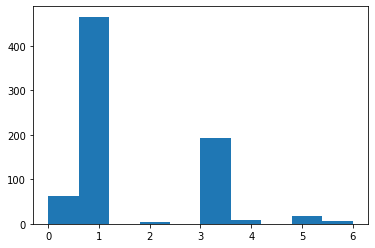

In [164]:
import matplotlib.pyplot as plt
plt.hist(km.labels_)


In [ ]:
["of","and","at","the","for","-","you","to","is","on","it","your","these","with"]

In [95]:
masque = [x==0 for x in  km.labels_]
tee[masque]
somme = [0 for i in tee.shape[1]]
for row in tee[masque]:
    


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])